In [2]:
# Import libraries
from bs4 import BeautifulSoup
import os

html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir('datasets'):
    #this is the path to the file. Don't touch!
    table_path = f'datasets/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path, 'r')
    # Read the contents of the file into 'html'
    html = BeautifulSoup(table_file)
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id='news-table')
    # Add the table to our dictionary
    html_tables[table_name] = html_table

print(html_tables)

{'fb_22sep.html': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Sep-22-18 11:08AM  </td><td align="left"><a class="tab-link-news" href="https://www.cnbc.com/2018/09/22/bret-taylor-salesforce-ex-google-facebook-profile.html?__source=yahoo%7Cfinance%7Cheadline%7Cstory%7C&amp;par=yahoo&amp;yptr=yahoo" target="_blank">How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce</a> <span style="color:#aa6dc0;font-size:9px">CNBC</span></td></tr>
<tr><td align="right" width="130">12:02AM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/draft-order-trump-crack-down-040227816.html" target="_blank">White House Drafts Order To Look Into Google, Facebook Practices</a> <span style="color:#aa6dc0;font-size:9px">Bloomberg</span></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 06

In [3]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.findAll('tr')

# For each row...
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'File number {i+1}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:
        break

File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  
File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


In [5]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split("_")[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, x.a.text])

print(parsed_news)

[['fb', 'Sep-22-18', '11:08AM', "How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce"], ['fb', 'Sep-22-18', '12:02AM', 'White House Drafts Order To Look Into Google, Facebook Practices'], ['fb', 'Sep-21-18', '06:21PM', 'Facebook Withdraws Direct Promotion of Political Campaigns'], ['fb', 'Sep-21-18', '06:18PM', "Facebook's Plan to Pull Back Campaign Support to Trump in 2020"], ['fb', 'Sep-21-18', '06:17PM', "Facebook's Plan to Pull Back Campaign Support to Trump in 2020"], ['fb', 'Sep-21-18', '06:10PM', 'Does F.A.N.G. still stand? 8 trades'], ['fb', 'Sep-21-18', '05:28PM', 'As stocks hit all-time highs, the F.A.N.G. trade is left ...'], ['fb', 'Sep-21-18', '05:21PM', 'Its time for companies to end the obsession with millennials and hire older workers with skills and expertise'], ['fb', 'Sep-21-18', '04:04PM', 'Earnings Reports for the Week of Sept. 24-28 (KBH, NKE, RAD)'], ['fb', 'Sep-21-18', '04:03PM', 'Dow marks 2nd all-time high in a row but

In [26]:
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon file
nltk.download('vader_lexicon')

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# Update the lexicon
vader.lexicon.update(new_words)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashvardhanjadhav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 5. BREAKING NEWS: NLTK Crushes Sentiment Estimates
<p>Now that we have the data and the algorithm loaded, we will get to the core of the matter: programmatically predicting sentiment out of news headlines! Luckily for us, VADER is very high level so, in this case, we will not adjust the model further<sup>*</sup> other than the lexicon additions from before.</p>
<p><sup>*</sup>VADER "out-of-the-box" with some extra lexicon would likely translate into <strong>heavy losses</strong> with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.</p>

In [10]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


nltk.download('vader_lexicon')

# Use these column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)

vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(head) for head in scored_news.headline]

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
scored_news = scored_news.join(scores_df)

# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

print(scored_news.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashvardhanjadhav/nltk_data...


  ticker        date     time  \
0     fb  2018-09-22  11:08AM   
1     fb  2018-09-22  12:02AM   
2     fb  2018-09-21  06:21PM   
3     fb  2018-09-21  06:18PM   
4     fb  2018-09-21  06:17PM   

                                            headline  neg    neu    pos  \
0  How former Facebook and Google engineer Bret T...  0.0  0.798  0.202   
1  White House Drafts Order To Look Into Google, ...  0.0  1.000  0.000   
2  Facebook Withdraws Direct Promotion of Politic...  0.0  1.000  0.000   
3  Facebook's Plan to Pull Back Campaign Support ...  0.0  0.787  0.213   
4  Facebook's Plan to Pull Back Campaign Support ...  0.0  0.787  0.213   

   compound  
0    0.5106  
1    0.0000  
2    0.0000  
3    0.4019  
4    0.4019  


/var/folders/66/wfh7gh351w3gw7_ss8s3s7n80000gn/T/ipykernel_73900/291290423.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  scored_news['date'] = pd.to_datetime(scored_news.date).dt.date


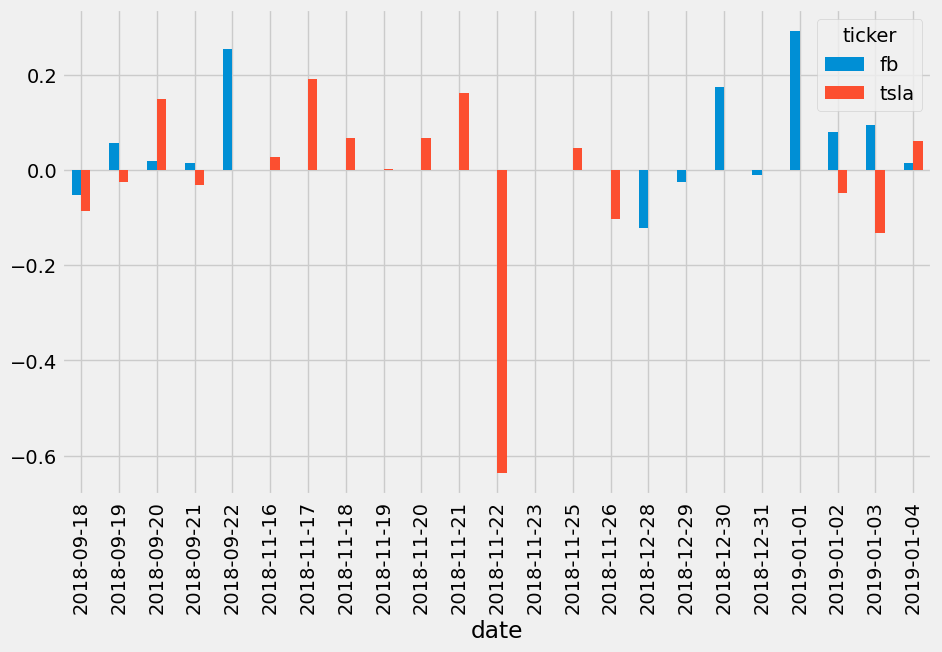

In [15]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# scored_news['compound'] = pd.to_numeric(scored_news['compound'], errors='coerce')

scored_news_numeric = scored_news[pd.to_numeric(scored_news['compound'], errors='coerce').notnull()]


scored_news_numeric['compound'] = pd.to_numeric(scored_news_numeric['compound'])

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news_numeric.groupby(['date', 'ticker'])['compound'].mean()

# Unstack the column ticker

mean_c = mean_c.unstack('ticker')

# # Get the cross-section of compound in the 'columns' axis
# mean_c = mean_c.xs('compound', axis='columns');

# # Plot a bar chart with pandas
# mean_c.plot.bar(figsize = (10, 6));

mean_c.plot.bar(figsize=(10, 6))
plt.show()

In [16]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()

# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset= ['headline', 'ticker'])

# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()

# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 500 headlines, now we have 476'

In [23]:
import pandas as pd

# Convert 'date' column to datetime
scored_news_clean['date'] = pd.to_datetime(scored_news_clean['date'])

# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])

# Cross-section the 'fb' row
single_day = single_day.xs('fb', level='ticker', drop_level=False)

# Check if the index ('fb', '2019-01-03') exists
if ('fb', '2019-01-03') in single_day.index:
    # Select the data for 'fb' on '2019-01-03'
    single_day = single_day.loc[('fb', '2019-01-03')]
else:
    print("Data for '2019-01-03' for 'fb' does not exist.")

# Convert the datetime string to datetime objects
single_day['time'] = pd.to_datetime(single_day['time'], format='%I:%M%p').dt.time


# Set the index to time 
single_day = single_day.set_index('time')

# Sort the DataFrame by index
single_day = single_day.sort_index()


/var/folders/66/wfh7gh351w3gw7_ss8s3s7n80000gn/T/ipykernel_73900/1905887933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scored_news_clean['date'] = pd.to_datetime(scored_news_clean['date'])
/var/folders/66/wfh7gh351w3gw7_ss8s3s7n80000gn/T/ipykernel_73900/1905887933.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ('fb', '2019-01-03') in single_day.index:
/var/folders/66/wfh7gh351w3gw7_ss8s3s7n80000gn/T/ipykernel_73900/1905887933.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  single_day = single_day.loc[('fb', '2019-01-03')]


Index(['headline', 'neg', 'neu', 'pos', 'compound'], dtype='object')


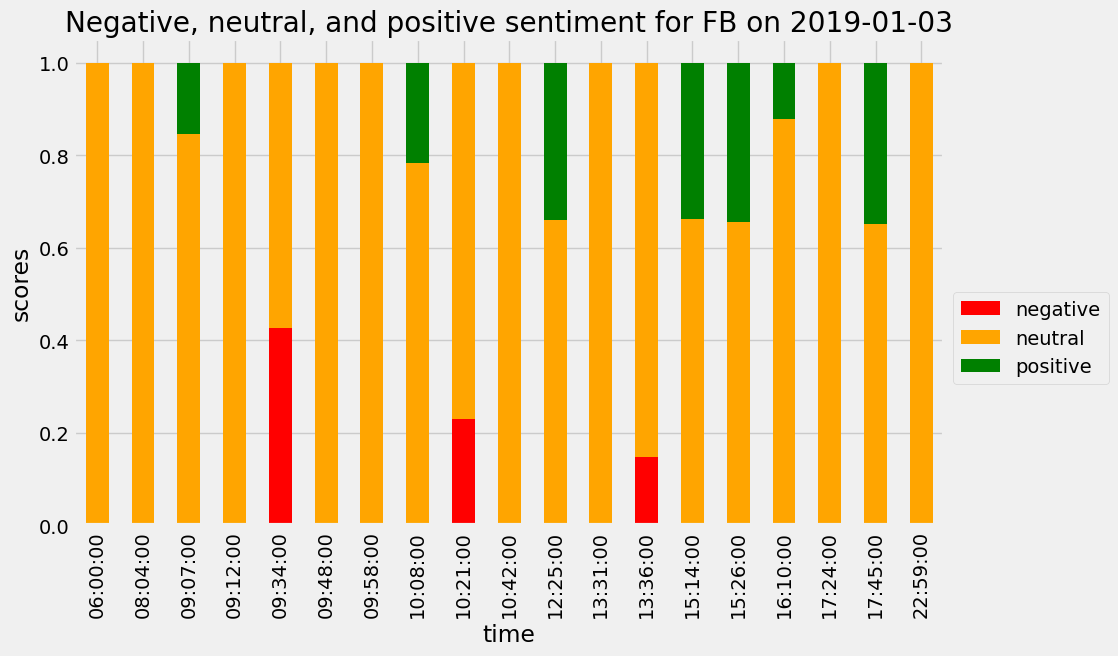

In [25]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]

# Check the column names of the DataFrame
print(single_day.columns)

# Drop the columns if they exist
if 'compound' in single_day.columns and 'headline' in single_day.columns:
    plot_day = single_day.drop(['compound', 'headline'], axis=1)
else:
    print("Columns 'compound' and 'headline' not found.")

# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']

plot_day.plot.bar(stacked=True, figsize=(10, 6), title=TITLE, color=COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('scores')
plt.show()
